# Relaciones no lineales

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ===== 1. Generación de datos (función no lineal + ruido) =====
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.3 * np.random.randn(*X.shape)  # y = sin(x) + ruido

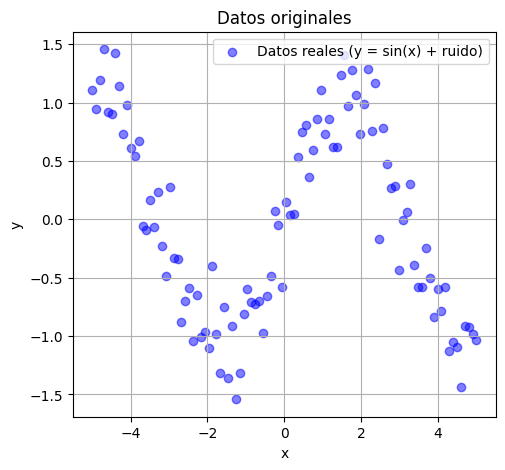

In [ ]:
# Gráfico 1: Datos originales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales (y = sin(x) + ruido)')
plt.title("Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()


In [ ]:
# Convertir a tensores PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.num_salidas_capa1 = 10  # Número de neuronas en la capa 1

        self.layer1 = nn.Linear(1, self.num_salidas_capa1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(self.num_salidas_capa1, 1)  # Salida escalar

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [ ]:
model = SimpleNN()

# ===== 3. Configuración del entrenamiento =====
criterion = nn.MSELoss()  # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador

# ===== 4. Entrenamiento =====
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ===== 5. Visualización =====
with torch.no_grad():
    predictions = model(X_tensor).numpy()



Epoch [100/1000], Loss: 0.2405
Epoch [200/1000], Loss: 0.0791
Epoch [300/1000], Loss: 0.0740
Epoch [400/1000], Loss: 0.0735
Epoch [500/1000], Loss: 0.0734
Epoch [600/1000], Loss: 0.0733
Epoch [700/1000], Loss: 0.0733
Epoch [800/1000], Loss: 0.0732
Epoch [900/1000], Loss: 0.0732
Epoch [1000/1000], Loss: 0.0732


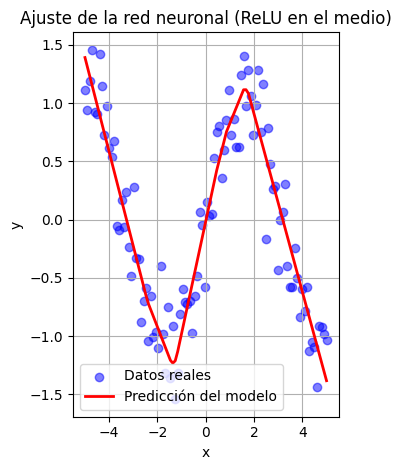

In [ ]:


# Gráfico 2: Ajuste del modelo
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X, predictions, color='red', linewidth=2, label='Predicción del modelo')
plt.title("Ajuste de la red neuronal (ReLU en el medio)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



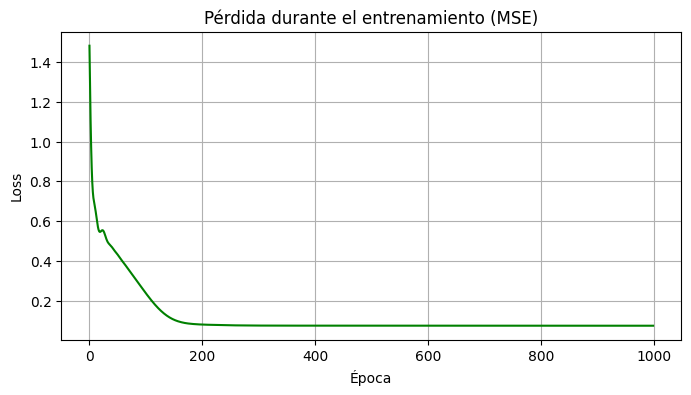

In [ ]:

# Gráfico 3: Evolución de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(loss_history, color='green')
plt.title("Pérdida durante el entrenamiento (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Imagenes

Como vienen las imagenes

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.87MB/s]


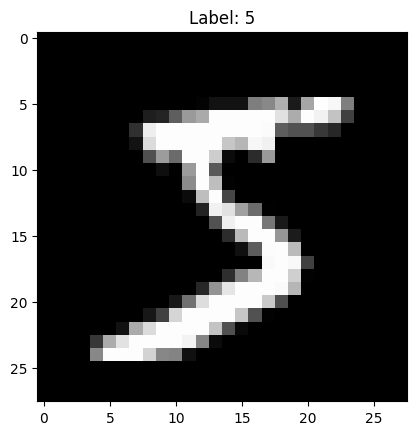

Dimensiones de la imagen: (28, 28)


In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST sin transformaciones
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

# Obtener una imagen del conjunto de entrenamiento
image, label = train_dataset[0]  # Obtener la primera imagen y su etiqueta

# Mostrar la imagen
plt.imshow(image, cmap='gray')  # Mostrar la imagen en escala de grises
plt.title(f'Label: {label}')
plt.show()

# Ver las dimensiones de la imagen original
print(f"Dimensiones de la imagen: {image.size}")


In [ ]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
image, label = train_dataset[0]
image

In [ ]:
import torch
from torchvision import datasets, transforms

# Definir la transformación (ToTensor convierte las imágenes en tensores)
transform = transforms.Compose([transforms.ToTensor()])

# Cargar el conjunto de datos MNIST con la transformación ToTensor
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


In [ ]:
image, label = train_dataset[59999]
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_dataset)

60000

In [ ]:
# Obtener las dimensiones de todas las imágenes en el conjunto de datos
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    print(f"Dimensiones de la imagen {i}: {image.shape}")
    # Puedes romper el ciclo si solo quieres ver algunas imágenes
    if i == 5:  # Ver solo las primeras 5 imágenes
        break


Dimensiones de la imagen 0: torch.Size([1, 28, 28])
Dimensiones de la imagen 1: torch.Size([1, 28, 28])
Dimensiones de la imagen 2: torch.Size([1, 28, 28])
Dimensiones de la imagen 3: torch.Size([1, 28, 28])
Dimensiones de la imagen 4: torch.Size([1, 28, 28])
Dimensiones de la imagen 5: torch.Size([1, 28, 28])


En una imagen en escala de grises (es decir, una imagen en blanco y negro), los valores de los píxeles siguen esta convención:

0 representa el negro.

255 representa el blanco

transforms.ToTensor() divide sobre 255

In [ ]:
train_dataset[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

. El conjunto de datos completo:
Conjunto de entrenamiento (train_dataset): Hay 60,000 imágenes en el conjunto de entrenamiento, por lo que el tensor que representa todas las imágenes de entrenamiento tendrá la forma 60,000 x 1 x 28 x 28.

Conjunto de prueba (test_dataset): Hay 10,000 imágenes en el conjunto de prueba, por lo que el tensor tendrá la forma 10,000 x 1 x 28 x 28.

3. ¿Cómo se representa todo esto en un tensor?
Cuando cargas el conjunto de datos con PyTorch (como en tu código con datasets.MNIST()), cada imagen es un tensor individual de forma 1 x 28 x 28, y el conjunto de datos completo se puede visualizar como un tensor de forma 60,000 x 1 x 28 x 28 para el entrenamiento.

Sin embargo, PyTorch maneja los datos en batches, lo que significa que no cargamos todo el conjunto de datos a la vez. En lugar de eso, PyTorch divide los datos en lotes pequeños (batches) y cada lote puede contener varias imágenes.

El train_loader proporciona los datos en batches de tamaño 64.

Por lo tanto, en lugar de manejar el tensor completo de 60,000 x 1 x 28 x 28, el DataLoader solo carga y maneja batches de tamaño 64.

Cuando iteras sobre el train_loader, cada batch que obtienes es un tensor de la forma 64 x 1 x 28 x 28, es decir, 64 imágenes en cada paso de entrenamiento. Este batch de tamaño 64 se pasará a través de la red neuronal para realizar el entrenamiento.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the transformation: Convert images to tensor and normalize them
#transform = transforms.Compose([
#    transforms.ToTensor(),  # Convert image to PyTorch tensor
#    transforms.Normalize((0.5,), (0.5,))  # Normalize the image with mean=0.5, std=0.5
#])

transform = transforms.Compose([
    transforms.ToTensor()  # Convert image to PyTorch tensor
])

# Load the MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check the number of training and test samples
print(f"Number of training samples: {len(train_loader.dataset)}")
print(f"Number of test samples: {len(test_loader.dataset)}")


Number of training samples: 60000
Number of test samples: 10000


In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional layer: Input 1 channel (grayscale), 32 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Second convolutional layer: Input 32 channels, 64 output channels
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Maxpool layer to reduce spatial size by half (2x2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layer 1: 64 channels * 7 * 7 pixels (from input size 28x28)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)

        # Fully connected layer 2: Output 10 classes (digits 0-9)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply first conv layer, ReLU, and MaxPool
        x = self.pool(F.relu(self.conv1(x)))

        # Apply second conv layer, ReLU, and MaxPool
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the output for fully connected layers
        x = x.view(-1, 64 * 7 * 7)

        # Apply first fully connected layer and ReLU
        x = F.relu(self.fc1(x))

        # Output layer (no activation here because CrossEntropyLoss does softmax internally)
        x = self.fc2(x)

        return x


Using device: cuda
Epoch [1/5], Loss: 0.1897
Epoch [2/5], Loss: 0.0551
Epoch [3/5], Loss: 0.0371
Epoch [4/5], Loss: 0.0279
Epoch [5/5], Loss: 0.0216


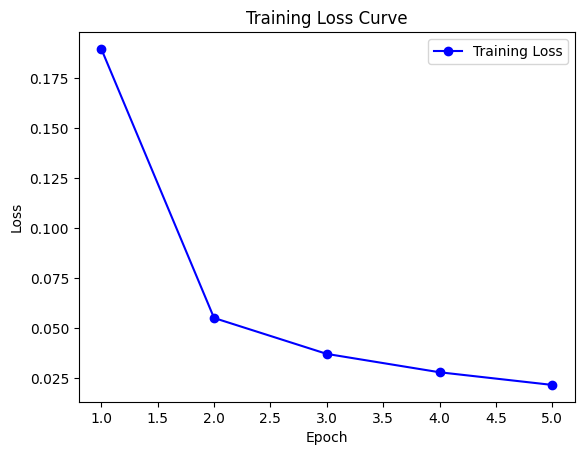

In [ ]:
# Choose the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model and move it to the chosen device
model = CNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Track training loss for plotting
epoch_losses = []

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Move images and labels to the device (GPU/CPU)
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for this epoch
    epoch_losses.append(running_loss / len(train_loader))
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Plot the training loss over epochs
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', color='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


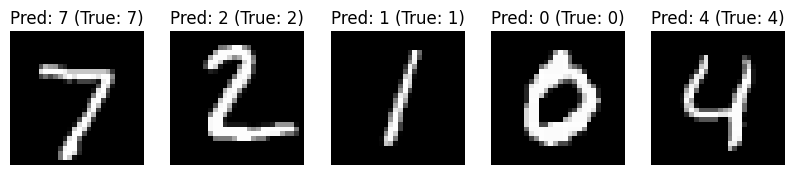

In [ ]:
# Plot the first 5 test images with predicted labels
data_iter = iter(test_loader)
images, labels = next(data_iter)  # Use next(data_iter) instead of data_iter.next()

# Move images and labels to device
images, labels = images.to(device), labels.to(device)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot images and predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()} (True: {labels[i].item()})")
    plt.axis('off')
plt.show()


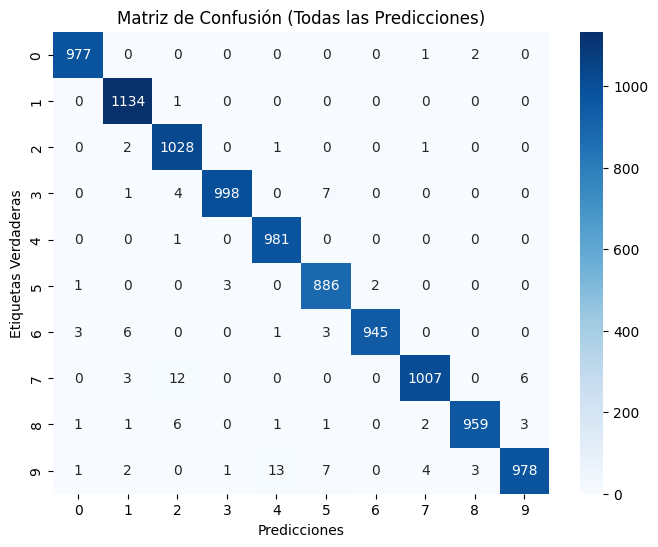

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Establecer el modelo en modo de evaluación
model.eval()

# Listas para almacenar todas las etiquetas y predicciones
all_labels = []
all_predictions = []

# Realizar la predicción para el conjunto de prueba
with torch.no_grad():  # Desactivamos el cálculo de gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Realizamos las predicciones
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Predicciones de las clases

        # Almacenamos todas las etiquetas y predicciones (correctas o incorrectas)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Generar la matriz de confusión para todas las predicciones (correctas e incorrectas)
cm = confusion_matrix(all_labels, all_predictions)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Matriz de Confusión (Todas las Predicciones)")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()


# Algunos detalles

In [ ]:
import random
import numpy as np
from PIL import Image
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, \
WeightedRandomSampler, SubsetRandomSampler
from torchvision.transforms.v2 import Compose, ToImage, Normalize,\
ToPILImage, RandomHorizontalFlip, Resize, ToDtype
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import numpy as np


def gen_img(start, target, fill=1, img_size=10):
    # Generates empty image
    img = np.zeros((img_size, img_size), dtype=float)

    start_row, start_col = None, None

    if start > 0:
        start_row = start
    else:
        start_col = np.abs(start)

    if target == 0:
        if start_row is None:
            img[:, start_col] = fill
        else:
            img[start_row, :] = fill
    else:
        if start_col == 0:
            start_col = 1

        if target == 1:
            if start_row is not None:
                up = (range(start_row, -1, -1),
                      range(0, start_row + 1))
            else:
                up = (range(img_size - 1, start_col - 1, -1),
                      range(start_col, img_size))
            img[up] = fill
        else:
            if start_row is not None:
                down = (range(start_row, img_size, 1),
                        range(0, img_size - start_row))
            else:
                down = (range(0, img_size - 1 - start_col + 1),
                        range(start_col, img_size))
            img[down] = fill

    return 255 * img.reshape(1, img_size, img_size)


def generate_dataset(img_size=10, n_images=100, binary=True, seed=17):
    np.random.seed(seed)

    starts = np.random.randint(-(img_size - 1), img_size, size=(n_images,))
    targets = np.random.randint(0, 3, size=(n_images,))

    images = np.array([gen_img(s, t, img_size=img_size)
                       for s, t in zip(starts, targets)], dtype=np.uint8)

    if binary:
        targets = (targets > 0).astype(int)

    return images, targets


import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def plot_images(images, targets, n_plot=30):
    n_rows = n_plot // 6 + ((n_plot % 6) > 0)
    fig, axes = plt.subplots(n_rows, 6, figsize=(9, 1.5 * n_rows))
    axes = np.atleast_2d(axes)

    for i, (image, target) in enumerate(zip(images[:n_plot], targets[:n_plot])):
        row, col = i // 6, i % 6
        ax = axes[row, col]
        ax.set_title('#{} - Label:{}'.format(i, target), {'size': 12})
        # plot filter channel in grayscale
        ax.imshow(image.squeeze(), cmap='gray', vmin=0, vmax=1)

    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.label_outer()

    plt.tight_layout()
    return fig


In [ ]:
images, labels = generate_dataset(
img_size=5, n_images=300, binary=True, seed=13)

In [ ]:
images.shape

(300, 1, 5, 5)

In [ ]:
images

array([[[[  0,   0, 255,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0, 255,   0,   0]]],


       [[[  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0, 255]]],


       [[[  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0],
         [  0,   0,   0,   0, 255]]],


       ...,


       [[[  0,   0,   0, 255,   0],
         [  0,   0, 255,   0,   0],
         [  0, 255,   0,   0,   0],
         [255,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0]]],


       [[[  0,   0,   0, 255,   0],
         [  0,   0,   0, 255,   0],
         [  0,   0,   0, 255,   0],
         [  0,   0,   0, 255,   0],
         [  0,   0,   0, 255,   0]]],


       [[[  0,   0,   0, 255,   0],
         [  0,   0, 255,   0, 

In [ ]:
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

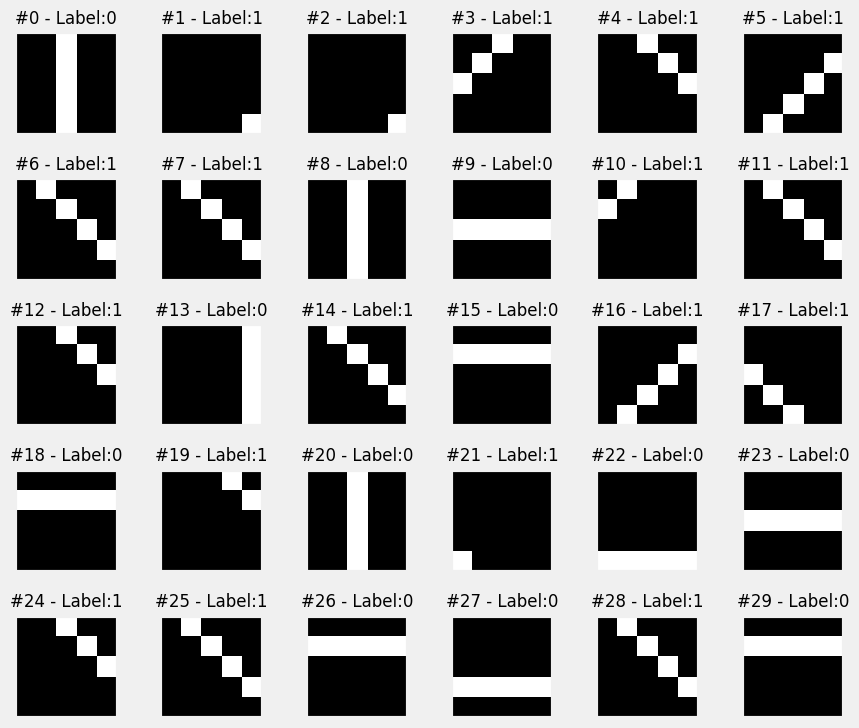

In [ ]:
fig = plot_images(images, labels, n_plot=30)

# Filtros

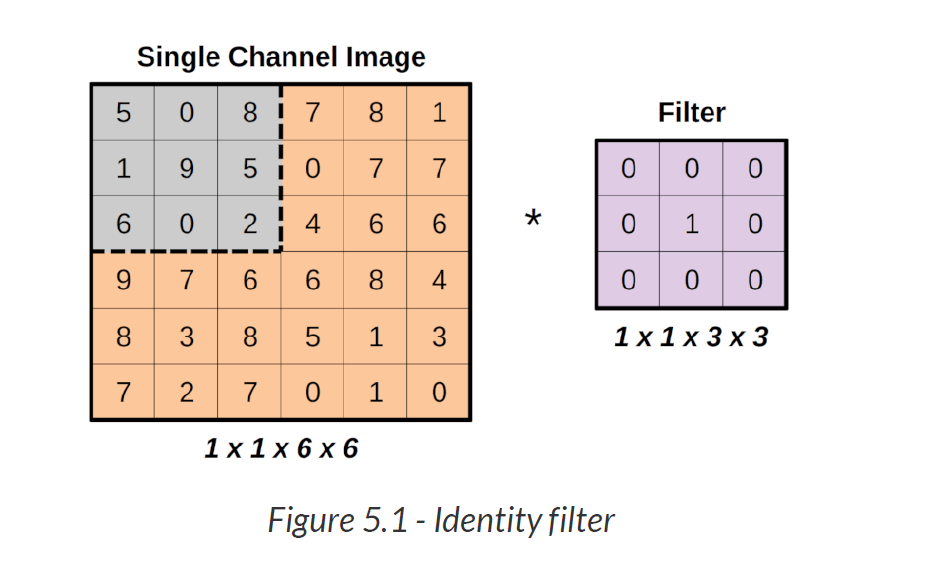![image.png](
  
)

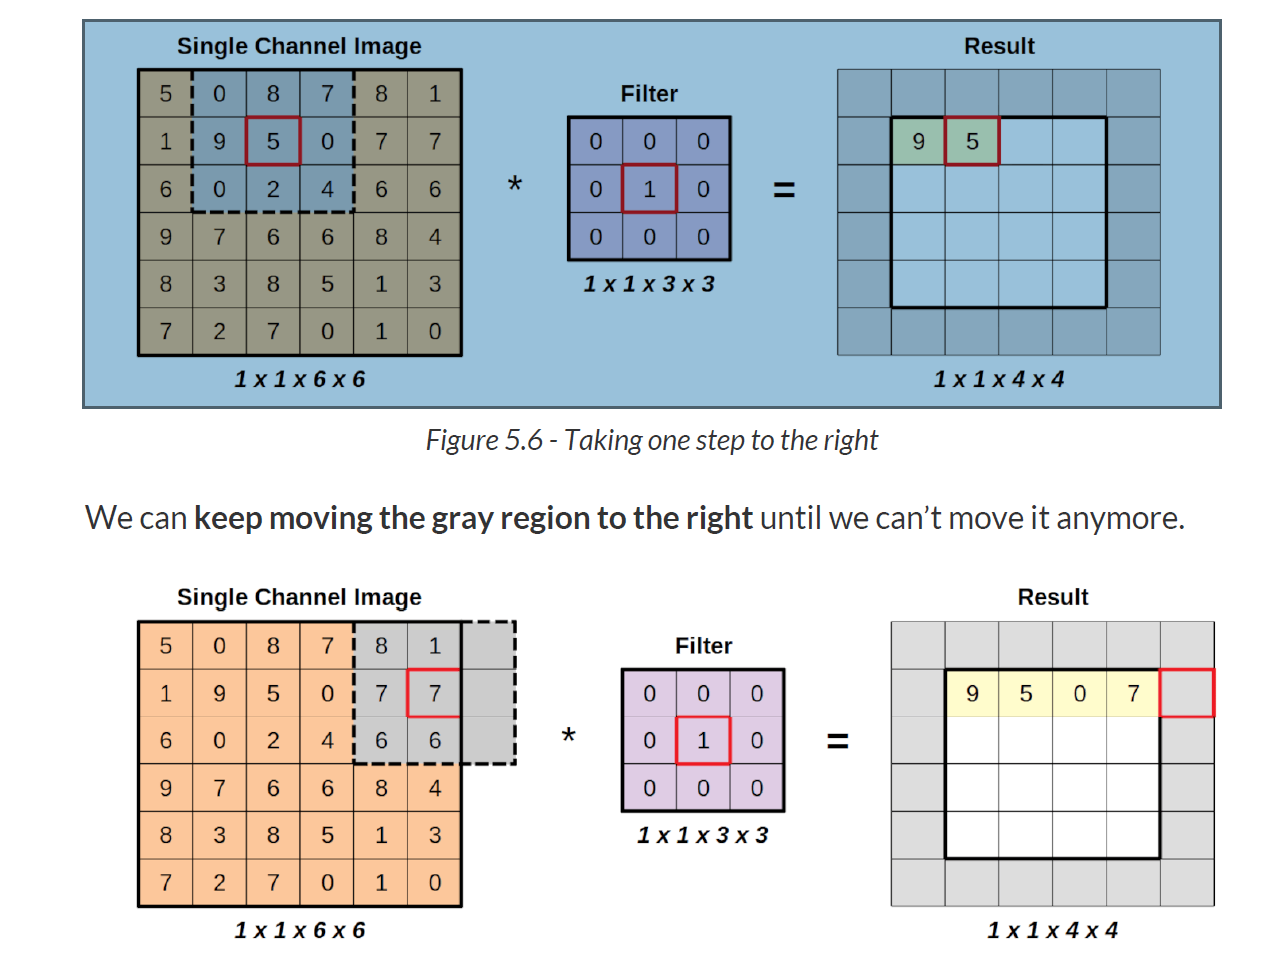

Stride: en este caso de tamaño 2:

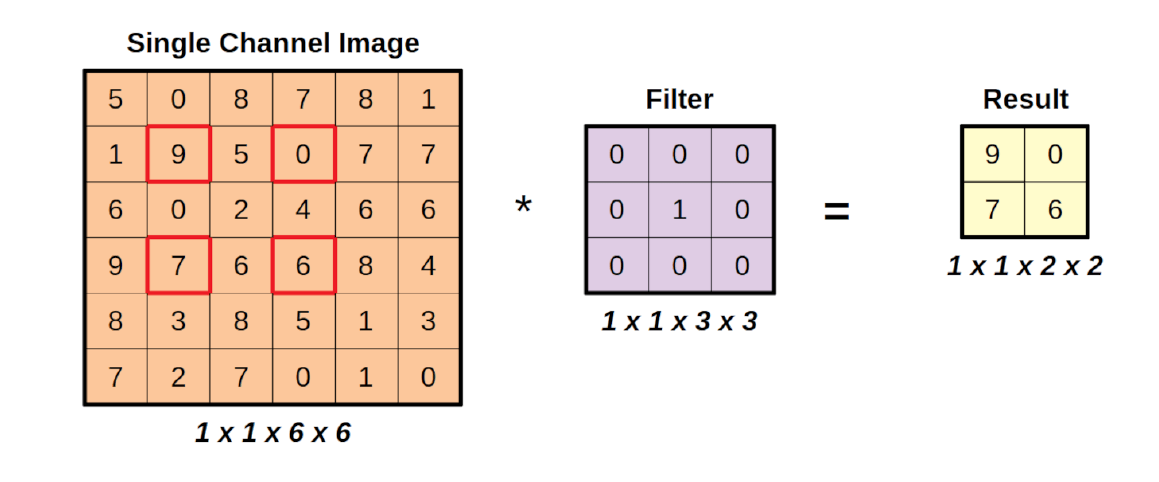

# Padding

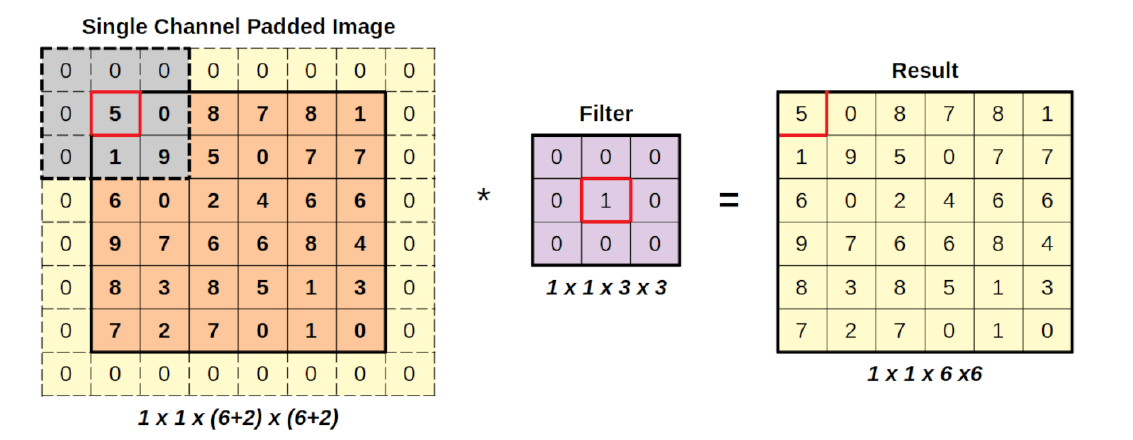

| Filtro | Matriz (3x3)                                      | ¿Qué detecta?                              |
|--------|---------------------------------------------------|--------------------------------------------|
| F1     | `[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]`              | Bordes verticales (Sobel)                  |
| F2     | `[1, 2, 1], [0, 0, 0], [-1, -2, -1]`              | Bordes horizontales (Sobel)                |
| F3     | `[0, 1, 0], [1, -4, 1], [0, 1, 0]`                | Detección de bordes (Laplace)              |
| F4     | `[-1, -1, -1], [2, 2, 2], [-1, -1, -1]`           | Bordes horizontales reforzados             |
| F5     | `[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]`           | Bordes verticales reforzados               |
| F6     | `[0, -1, 1], [-1, 0, 1], [-1, -1, 0]`             | Diagonal ↘                                 |
| F7     | `[1, -1, 0], [1, 0, -1], [0, 1, -1]`              | Diagonal ↙                                 |
| F8     | `[1, 1, 1], [1, -8, 1], [1, 1, 1]`                | Borde total (Laplace generalizado)         |
| F9     | `[0, 0, 0], [1, -2, 1], [0, 0, 0]`                | Filtro horizontal de paso alto             |
| F10    | `[0, 1, 0], [0, -2, 0], [0, 1, 0]`                | Filtro vertical de paso alto               |
| F11    | `[1, 0, -1], [0, 0, 0], [-1, 0, 1]`               | Detalles diagonales cruzados               |
| F12    | `[0, 0, 0], [0, 1, 0], [0, 0, 0]`                 | Identidad (no cambia la imagen)            |
| F13    | `[1, 1, 1], [1, 1, 1], [1, 1, 1]`                 | Suavizado (promedio)                       |
| F14    | `[0, 0, 0], [0, 1, 0], [0, 0, -1]`                | Detección de curva inferior                |
| F15    | `[-1, 0, 0], [0, 1, 0], [0, 0, 1]`                | Detección de curva superior derecha        |
| F16    | `[1, 0, -1], [0, 0, 0], [-1, 0, 1]`               | Bordes cruzados                            |
| F17    | `[-1, -1, -1], [0, 0, 0], [1, 1, 1]`              | Gradiente vertical                         |
| F18    | `[1, 0, -1], [1, 0, -1], [1, 0, -1]`              | Gradiente horizontal                       |
| F19    | `[2, -1, 0], [-1, 0, 1], [0, 1, -2]`              | Detección de formas asimétricas            |
| F20    | `[0, 0, 0], [1, -1, 1], [0, 0, 0]`                | Curvas interiores                          |
| F21    | `[0, 1, 0], [1, -4, 1], [0, 1, 0]`                | Variante de Laplaciano centrado            |
| F22    | `[1, 1, 0], [1, 0, -1], [0, -1, -1]`              | Bordes rotados                             |
| F23    | `[1, -1, 1], [-1, 1, -1], [1, -1, 1]`             | Filtro de patrón repetido                  |
| F24    | `[0, 2, 0], [-1, 0, -1], [0, -2, 0]`              | Curvatura simétrica                        |
| F25    | `[0, 1, 0], [-1, 0, -1], [0, 1, 0]`               | Cruz suave                                 |
| F26    | `[1, -2, 1], [-2, 5, -2], [1, -2, 1]`             | Detección de punto agudo                   |
| F27    | `[0, 0, 1], [0, 1, 0], [1, 0, 0]`                 | Esquinas (↖ y ↘)                           |
| F28    | `[1, 0, 0], [0, 1, 0], [0, 0, 1]`                 | Diagonal principal (↘)                     |
| F29    | `[0, 0, 1], [0, 1, 0], [1, 0, 0]`                 | Diagonal secundaria (↙)                    |
| F30    | `[2, 0, -2], [0, 0, 0], [-2, 0, 2]`               | Bordes extremos                            |
| F31    | `[-1, 1, -1], [1, 0, 1], [-1, 1, -1]`             | Curvas pronunciadas                        |
| F32    | `[1, -1, 1], [-1, 1, -1], [1, -1, 1]`             | Patrón de contraste intercalado            |
